In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Define the neural network architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),    # Flatten the input images
    keras.layers.Dense(256, activation='relu'),    # Hidden layer with ReLU activation
    keras.layers.Dense(10, activation='softmax')   # Output layer with softmax activation
])

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2243 - accuracy: 0.9359 - val_loss: 0.1096 - val_accuracy: 0.9659
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0947 - accuracy: 0.9721 - val_loss: 0.0857 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0653 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0672 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0694 - val_accuracy:

In [37]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.9949
Training Loss: 0.015334345400333405
Training Accuracy: 0.994866669178009


In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9763
Test Loss: 0.09627578407526016
Test Accuracy: 0.9763000011444092


In [22]:
# Calculate predictions on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [18]:
import sklearn
from sklearn import metrics

# Calculate F1-Score
f1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1_score)

F1-Score: 0.9763060858536706


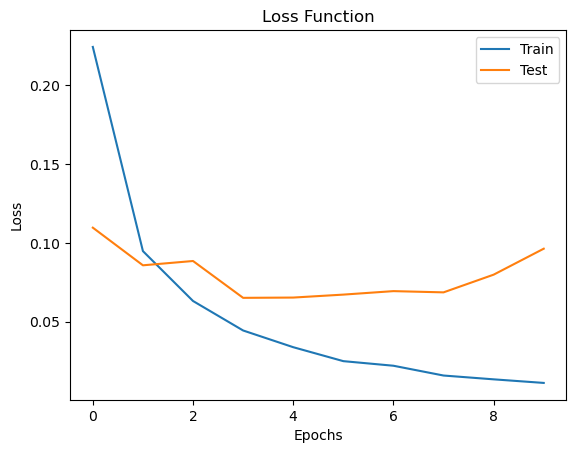

In [19]:
# Plot the loss function vs. epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

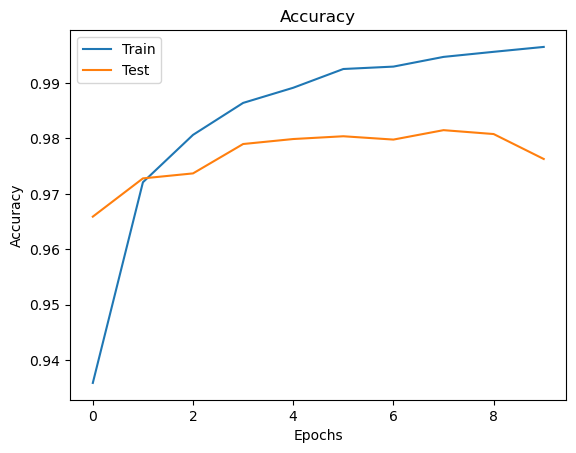

In [20]:
# Plot the accuracy vs. epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

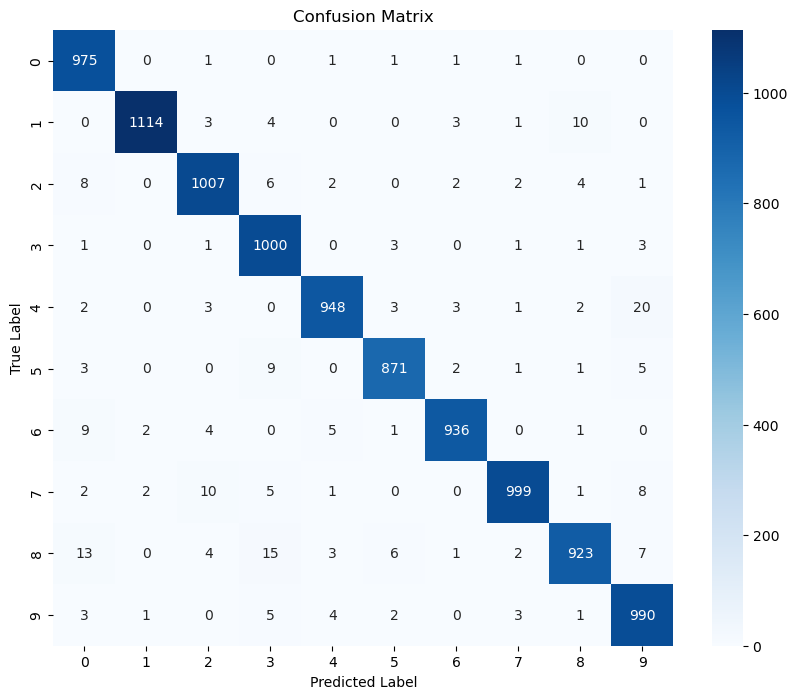

In [25]:
import seaborn as sns
# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
# Compute Confusion Matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_labels)

In [30]:
# Compute Specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

In [31]:
# Compute Sensitivity
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])

In [32]:
# Compute Precision
precision = confusion_matrix[1, 1] / (confusion_matrix[0, 1] + confusion_matrix[1, 1])

In [ ]:
# Compute Recall
recall = sensitivity

In [34]:
# Compute Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_labels)

In [35]:
# Compute F1-Score
f1_score = sklearn.metrics.f1_score(y_test, y_pred_labels, average='weighted')

In [36]:
# Print the metrics
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)


Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 0.9763
F1-Score: 0.9763060858536706
